In [1]:
import pygame

HEIGHT = 224*4
WIDTH = 240*4
FPS = 60

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Moving ball")
clock = pygame.time.Clock()

ball = pygame.image.load("ball.gif")
ballrect = ball.get_rect()
ballrect.center = WIDTH/2, HEIGHT/2
speed = [2, 3]


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
pygame.rect.Rect(0,0,111,111)

<rect(0, 0, 111, 111)>

In [3]:
print(ball.get_rect())

<rect(0, 0, 111, 111)>


In [4]:
import numpy as np
z = np.load("1.npy")
from matplotlib import pyplot as plt
plt.imshow(z[0])

240 224


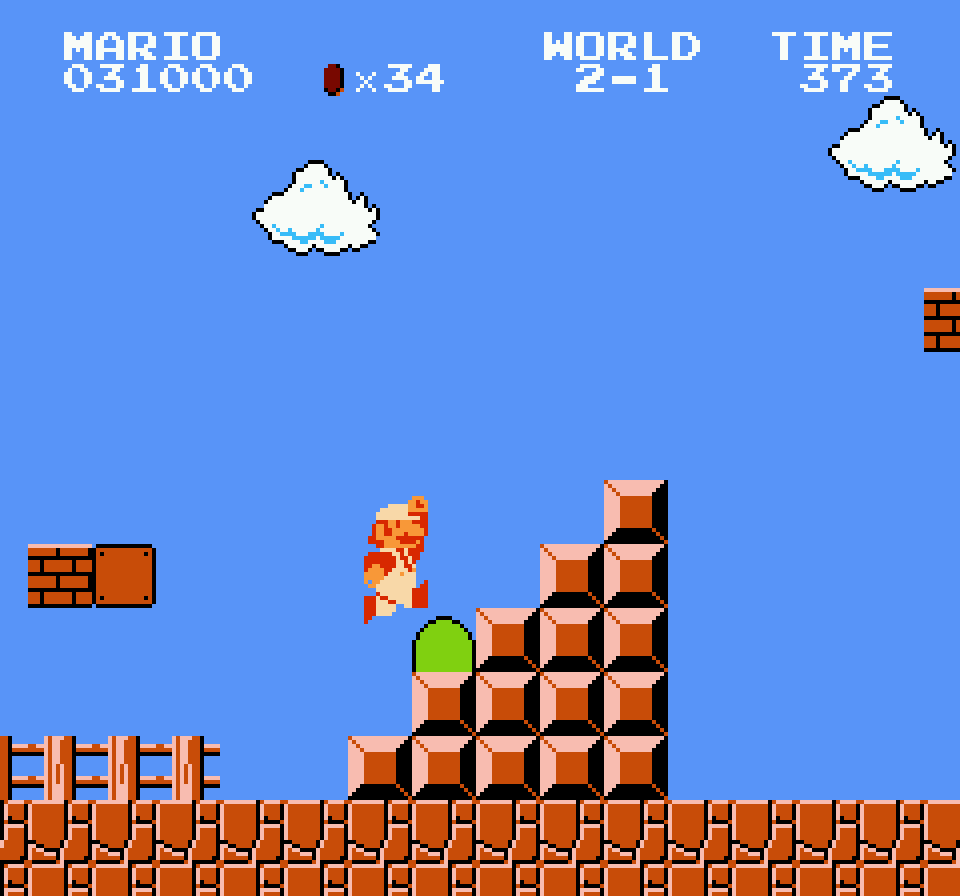

In [5]:
# if input image is in range 0..1, please first multiply img by 255
# assume image is ndarray of shape [height, width, channels] where channels can be 1, 3 or 4
import PIL.Image

def zoom(img, zoom):
    w, h = img.size
    print(w,h)
    zoom2 = zoom * 2
    return img.resize((w*zoom, h*zoom), PIL.Image.NEAREST)

zoom(PIL.Image.fromarray(z[1000]), 4)

In [6]:
import scipy.ndimage
print(scipy.ndimage.zoom(z[0],(4,4,1)).shape)

(896, 960, 3)


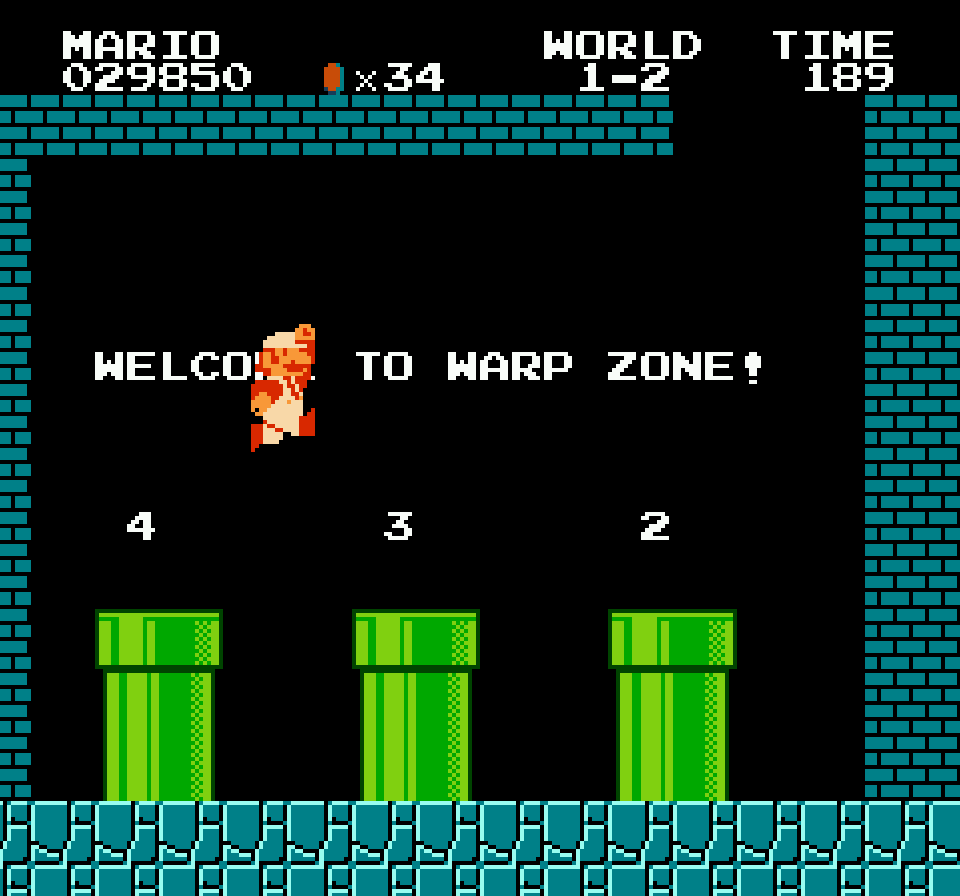

In [7]:
surf = scipy.ndimage.zoom(z[0],(4,4,1),order=0)
PIL.Image.fromarray(surf)

In [8]:

surf = pygame.surfarray.make_surface(surf)
surf = pygame.transform.rotate(surf, 90,)
surf = pygame.transform.flip(surf, 0, 1)
rect = pygame.rect.Rect(0,0,WIDTH,HEIGHT)

In [18]:

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

BGCOLOR=WHITE
sqrect = pygame.rect.Rect(0,0,4,4)
timer = 0
pos_x, pos_y = 0, 0
left, right, forward, backward = False, False, False, False
accel = 0

from pygame.locals import *

In [20]:
while 1:
    for event in pygame.event.get():
        if event.type == pygame.QUIT: 
            quit()
        if event.type == KEYDOWN:
            if event.key == K_LEFT:
                left = True
            elif event.key == K_RIGHT:
                right = True
            elif event.key == K_UP:
                forward = True
            elif event.key == K_DOWN:
                backward = True

        if event.type == KEYUP:
            left, right, forward, backward = False, False, False, False
            if event.key == K_LEFT:
                left = False
            elif event.key == K_RIGHT:
                right = False
            elif event.key == K_UP:
                forward = False
            elif event.key == K_DOWN:
                backward = False

    timer+=1
    if left:
        pos_x -= 4
    elif right:
        pos_x += 4
    if backward:
        pos_y += 4
    elif forward:
        pos_y -= 4
    screen.fill(WHITE)
    screen.blit(surf, rect)
    sqrect = pygame.rect.Rect(pos_x,pos_y,4,4)
    # Just draw the rect with the current button color.
    pygame.draw.rect(screen, BGCOLOR, sqrect)
    if timer > 45:
        if BGCOLOR == BLACK:
            BGCOLOR = WHITE
        else:
            BGCOLOR = BLACK
        timer = 0
    pygame.display.flip()
    clock.tick(FPS)

KeyboardInterrupt: 